<a href="https://colab.research.google.com/github/annalunde/SARIMAX-Model-DeviationForecast/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import statsmodels.api as sm

color = sns.color_palette()
sns.set_style('darkgrid')

In [ ]:
#path = "input/AirPassengers.csv" #For local
df = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/exercise01(1).csv', sep=";", index_col=0)

#Parse strings to datetime type
#df["date"] = pd.Series(
#    pd.date_range("2020-01-01", periods=len(df['MeasurementNo']), freq="Y")
#)

#df = df.drop(["MeasurementNo"], axis=1)
#df = df.set_index('MeasurementNo')
df['Deviation'] = df['Deviation'].str.replace(',', '.').astype(float)


In [ ]:
df.head()

,Deviation
MeasurementNo,
1,-0.071
2,0.348
3,-0.391
4,-0.196
5,0.271


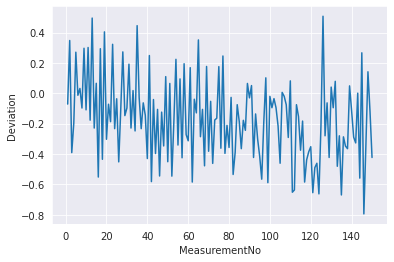

In [ ]:
plt.plot(df.index,df["Deviation"])
plt.xlabel("MeasurementNo")
plt.ylabel("Deviation")
plt.show()

<Figure size 432x288 with 0 Axes>

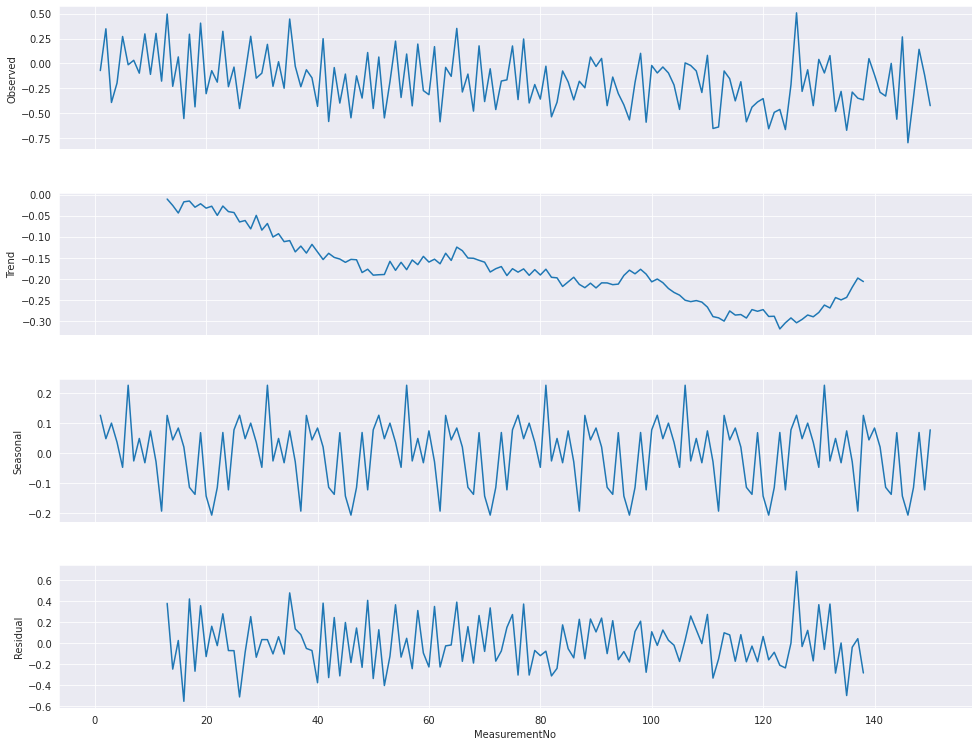

In [ ]:
## plot graph
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Deviation'], model='additive', freq=25)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

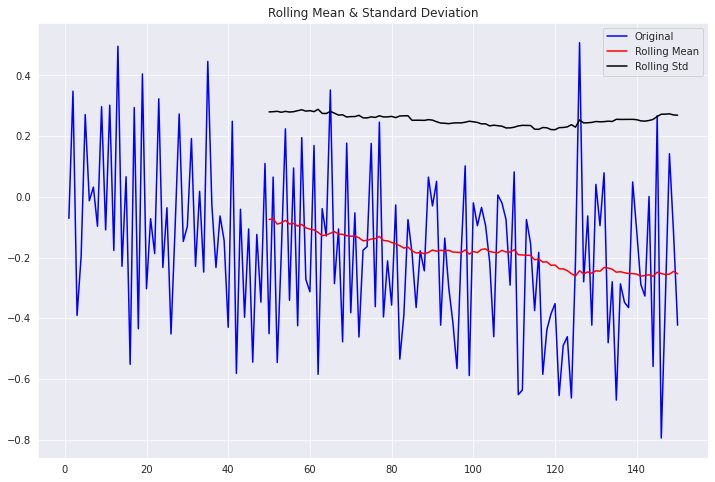

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -7.198444e+00
p-value                        2.400268e-10
#Lags Used                     1.000000e+00
Number of Observations Used    1.480000e+02
Critical Value (1%)           -3.475325e+00
Critical Value (5%)           -2.881275e+00
Critical Value (10%)          -2.577293e+00
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 50, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

test_stationarity(df['Deviation'])

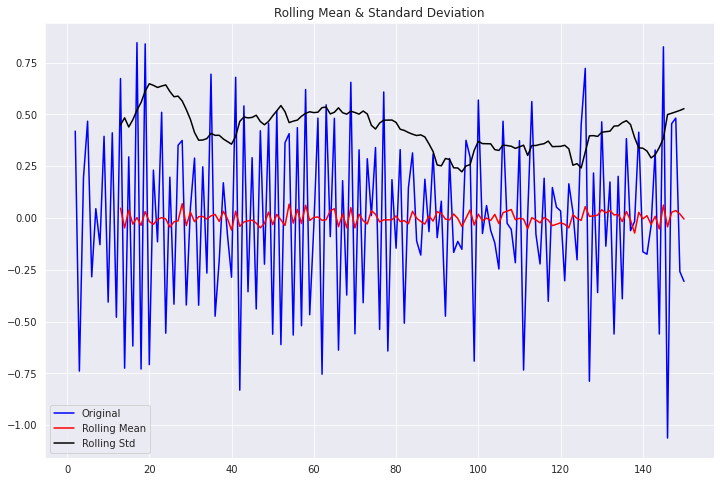

Results of Dickey-Fuller Test:
p-value = 0.0001. The series is likely stationary.
Test Statistic                  -4.648867
p-value                          0.000105
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


In [ ]:
first_diff = df.Deviation - df.Deviation.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

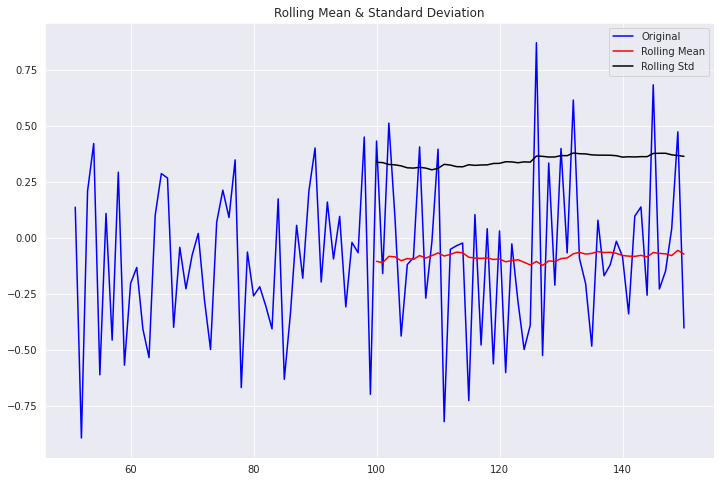

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.363785e+01
p-value                        1.674972e-25
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


In [ ]:
df['seasonal_difference'] = df.Deviation - df.Deviation.shift(50) 
test_stationarity(df.seasonal_difference.dropna(inplace=False))

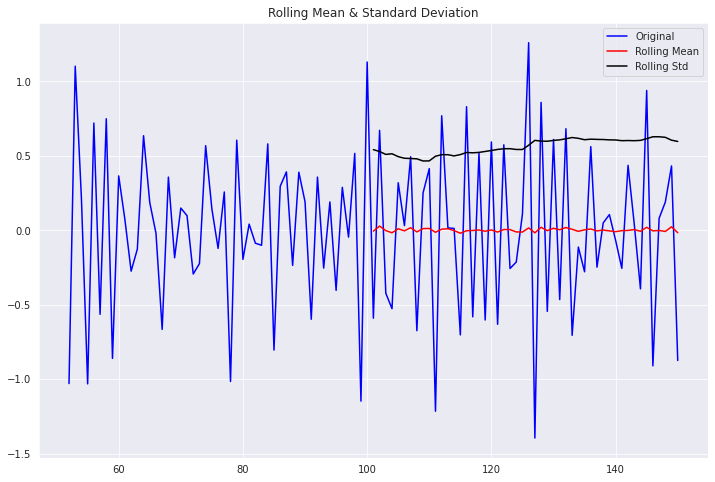

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -7.484328e+00
p-value                        4.682260e-11
#Lags Used                     4.000000e+00
Number of Observations Used    9.400000e+01
Critical Value (1%)           -3.501912e+00
Critical Value (5%)           -2.892815e+00
Critical Value (10%)          -2.583454e+00
dtype: float64


In [ ]:
df['seasonal_first_difference'] = df.seasonal_difference - df.seasonal_difference.shift(1)  
test_stationarity(df.seasonal_first_difference.dropna(inplace=False))

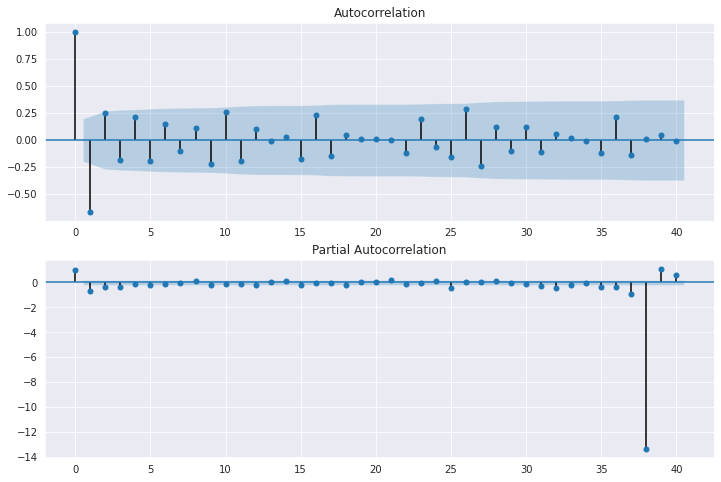

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[51:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[51:], lags=40, ax=ax2)

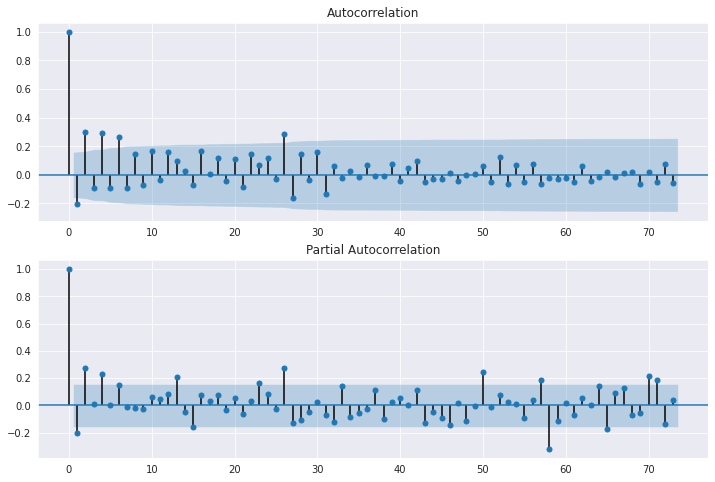

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Deviation, lags=73, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Deviation, lags=73, ax=ax2)# , lags=40

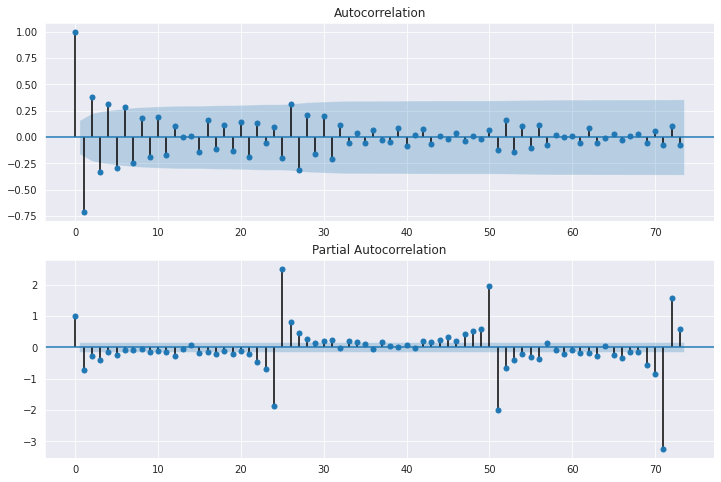

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=73, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=73, ax=ax2)# , lags=40

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.Deviation[:112]
test = df.Deviation[112:]

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})


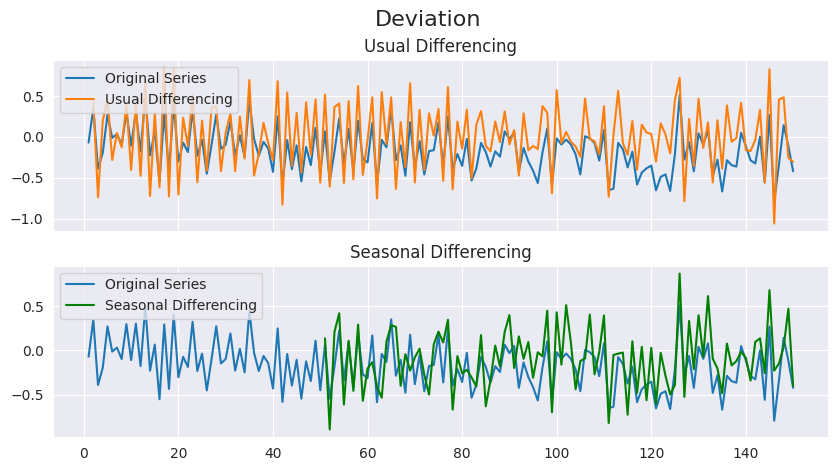

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df.Deviation[:], label='Original Series')
axes[0].plot(df.Deviation[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(df.Deviation[:], label='Original Series')
axes[1].plot(df.Deviation[:].diff(50), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Deviation', fontsize=16)
plt.show()

In [ ]:
!pip3 install pyramid-arima
!pip install pmdarima

In [ ]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=73.001, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=34.510, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=71.616, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=57.585, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=24.429, Time=1.45 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.08 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=37.827, Time=0.87 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=25.522, Time=2.10 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=25.163, Time=1.99 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=27.656, Time=1.30 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=27.123, Time=2.58 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=30.107, Time=0.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  112
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                  -7.215
Date:                            Sun, 21 Feb 2021   AIC                             24.429
Time:                                    16:27:20   BIC                             37.455
Sample:                                         0   HQIC                            29.701
                                            - 112                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0824      0.034     -2.425      0.015      -0.149      -0.016
ar.L1         -0.3818      0.098     -3.878      0.000      -0.575      -0.189
ar.S.L12      -0.7038      0.138     -5.107      0.000      -0.974      -0.434
ar.S.L24      -0.3862      0.141     -2.737      0.006      -0.663      -0.110
sigma2         0.0627      0.011      5.581      0.000       0.041       0.085
===================================================================================
Ljung-Box (Q):                       24.27   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.98   Prob(JB):                         0.29
Heteroskedasticity (H):               1.20   Skew:                             0.37
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

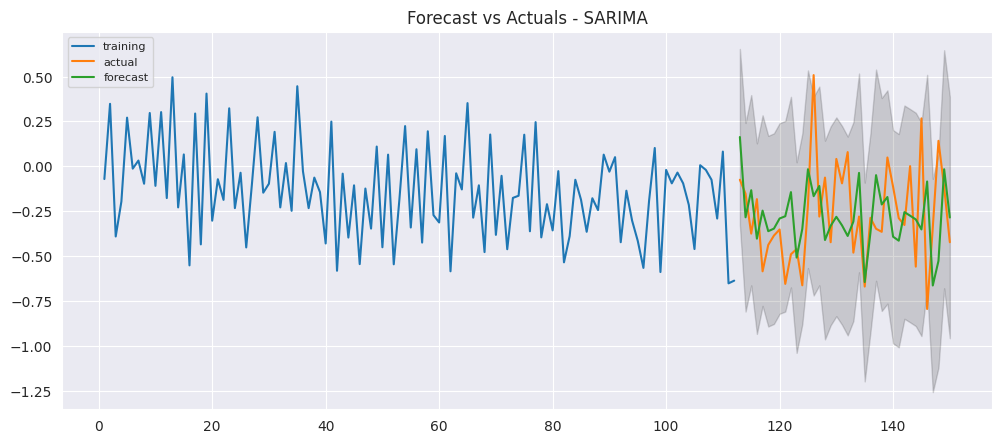

In [ ]:
# Forecast
n_periods = 38
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=test.index)
lower_series = pd.Series(confint[:, 0], index=test.index)
upper_series = pd.Series(confint[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fitted_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals - SARIMA')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
forecast_accuracy(fitted, test.values)

{'acf1': -0.025518522680734537,
 'corr': 0.07034363816167254,
 'mae': 0.25547092453791753,
 'mape': 8.70189447888624,
 'me': -0.009904711568973412,
 'minmax': 6.252148978411114,
 'mpe': -7.950681677637295,
 'rmse': 0.310706875100529}

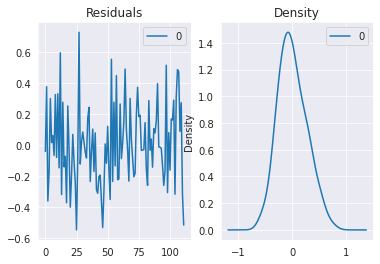

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(smodel.resid())
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
print(smodel.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  112
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                  -7.215
Date:                            Sun, 21 Feb 2021   AIC                             24.429
Time:                                    16:28:24   BIC                             37.455
Sample:                                         0   HQIC                            29.701
                                            - 112                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0824      0.034     -2.425      0.015      -0.149      -0.016
ar.L1         -0.3818      0.098   

In [ ]:
#Build model on full training set to give most accurate next prediction
smodel = pm.arima.ARIMA((1,0,0), seasonal_order=(2, 1, 0, 12), intercept = -0.0824).fit(df.Deviation)
fitted, confint = smodel.predict(n_periods=1, return_conf_int=True)
print(fitted, confint)

[-0.14134349] [[-0.67328661  0.39059964]]
